# 1.) Import the Credit Card Fraud Data From CCLE

In [37]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [13]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")


In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [15]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [16]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [17]:
type(df_select["trans_date_trans_time"][0])

str

In [18]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-18-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [19]:
dir(df_select["trans_date_trans_time"][0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_repr_base',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_

In [20]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-20-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [21]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [22]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# XXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS

In [24]:
resample_X = X
resample_y = y

# 5.) Train a Logistic regression.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(resample_X)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:


log_reg = LogisticRegression().fit(X_normalized, resample_y)

In [35]:
y_pred = log_reg.predict(X_normalized)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

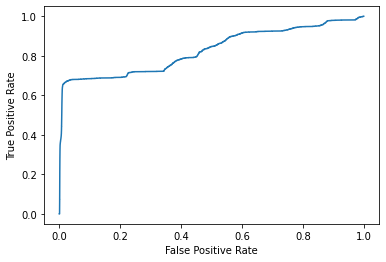

In [55]:
# ASK chatgpt
# If you dont like the code ask in a different way

from sklearn.metrics import roc_auc_score, roc_curve
# Make predictions using the logistic regression model
y_pred_proba = log_reg.predict_proba(X_normalized)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(resample_y, y_pred_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Find the threshold that corresponds to the desired FPR of 5%
index = np.where(fpr <= 0.05)[0]
threshold = thresholds[index[0]]

# Use this threshold for making predictions in the future
y_pred = (y_pred_proba[:,1] > threshold).astype(int)

In [59]:
print (threshold)

1.9999999999999998


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [60]:
df_temp = df_select.copy()

In [61]:
df_temp["pred"] = log_reg.predict(resample_X)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
df_temp = df_temp[["pred", "is_fraud", "amt"]]

In [63]:
df_temp.head()
# Which combinations of "pred" and "if_fraud" do we profit .02*amt, which cases do 
# we lose -amt??

,pred,is_fraud,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


In [65]:
true_a = df_temp.loc[(df_temp['pred'] == 0) & (df_temp['is_fraud'] == 0), 'amt'].sum()*0.02
true_b = df_temp.loc[(df_temp['pred'] == 1) & (df_temp['is_fraud'] == 1), 'amt'].sum()*0.02
false_a = df_temp.loc[(df_temp['pred'] == 1) & (df_temp['is_fraud'] == 0), 'amt'].sum()
false_b = df_temp.loc[(df_temp['pred'] == 0) & (df_temp['is_fraud'] == 1), 'amt'].sum()
profit = true_a + true_b - false_a - false_b
profit

-5495046.260000001

It can be seen that the model needs further adjustment to reduce the errors. This model will lead the company to lose big amount of money becasue of the fales positives and negatives. 

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [ ]:
# If most or all your variables go to 0 => Your data is garbage
# The regularization will tell us if our model has significance
# This of using coefficient strength similar to r^2

In [69]:
from sklearn.linear_model import Lasso

clf = Lasso()
# Ridge regularization parameter
alphas = np.logspace(start = -3, stop = 4, base = 10)
# Train the model with different regularization strengths
coefs = []
for a in alphas:
  clf.set_params(alpha = a)
  clf.fit(resample_X, resample_y)
  coefs.append(clf.coef_)


(0.00044668359215096305,
 22387.21138568338,
 -3.604626722271198e-06,
 7.567258194453309e-05)

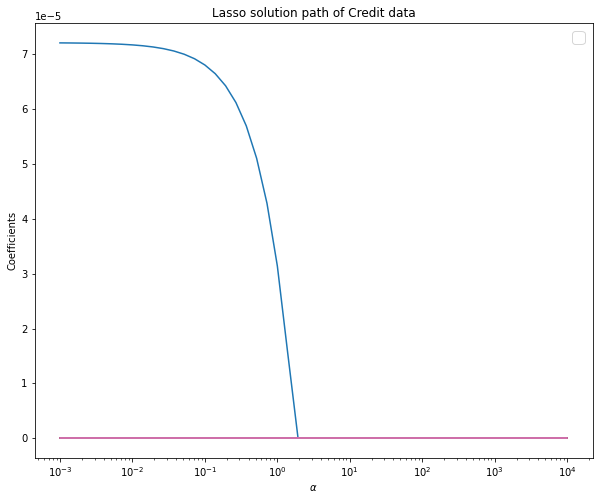

In [75]:
# Visualize Ridge solution path
plt.figure(figsize = (10, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.legend(fontsize = 16)
plt.xlabel(r"$\alpha$")
plt.ylabel("Coefficients")
plt.title("Lasso solution path of Credit data")
plt.axis("tight")

it can be seen that all variables except one are approching to zero which requires to be eleminated or replaced.